# Global approach
## Comparison between all machine learning algorithms over 2011-2019

In [41]:
import xarray as xr
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import yaml
import pickle as pkl
import datetime

import src.utils.load_config as load_config

import src.visualization.visualize_pca as visualize_pca
from src.visualization import visualize_sit_corr as vsc
from src.utils import modif_plot
from src.feature_extraction import baseline
from src.modelling import sit_corrected

In [42]:
import src.utils.tardisml_utils as tardisml_utils
rootdir = tardisml_utils.get_rootdir()

In [43]:
models = {}

In [44]:
from importlib import reload
reload(sit_corrected);

### AK model

In [45]:
# irootdir= '/cluster/work/users/leoede/'
irootdir= f'{rootdir}' 
ipath = 'Leo/results/ak_221214-142044/'
ml_name ='AK'

In [47]:
ifile = f'{irootdir}{ipath}' # '{iname}'
models[f'{ml_name}'] = sit_corrected.SITCorrected(ifile, name=ml_name, verbose=1)

Config file found: /scratch/project_465000269/edelleo1/Leo/results/ak_221214-142044/data_proc_full.yaml
Old config files, some <ml> parameters are not imported.
Old config files, <dataset> parameters are not imported.
Folder: Leo/results/ak_221214-142044/figures/sit_reconstruct/

Initialisation SIT from AK
ML prediction .nc file found: /scratch/project_465000269/edelleo1/Leo/results/ak_221214-142044/ml/ypred_AK.nc


### CNN model

In [61]:
# irootdir= '/cluster/work/users/leoede/'
irootdir= f'{rootdir}' 
# ipath = 'Leo/results/cnn_Npred22_7F_rw29d_N8844_H1333_Hn0000_sithick_artc_221121-164206/'
ipath = 'Leo/results/cnn_221214-131355/'
ml_name ='CNN'

In [62]:
ifile = f'{irootdir}{ipath}' # '{iname}'
models[f'{ml_name}'] = sit_corrected.SITCorrected(ifile, name=ml_name, verbose=1)

Config file found: /scratch/project_465000269/edelleo1/Leo/results/cnn_221214-131355/data_proc_full.yaml
Old config files, some <ml> parameters are not imported.
Old config files, <dataset> parameters are not imported.
Folder: Leo/results/cnn_221214-131355/figures/sit_reconstruct/

Initialisation SIT from CNN
ML prediction .nc file found: /scratch/project_465000269/edelleo1/Leo/results/cnn_221214-131355/ml/ypred_CNN.nc


### LSTM model

In [8]:
irootdir= f'{rootdir}' 
# irootdir= '/cluster/work/users/leoede/'
# ipath = 'Leo/results/lstm_Npred22_7F_rw29d_N8844_H1333_Hn0000_sithick_artc_221121-164206/'
ipath = 'Leo/results/lstm_221214-133340/'
ml_name ='LSTM3_bk'

In [9]:
ifile = f'{irootdir}{ipath}' # '{iname}'
models[f'{ml_name}'] = sit_corrected.SITCorrected(ifile, name=ml_name, verbose=1)

Config file found: /scratch/project_465000269/edelleo1/Leo/results/lstm_221214-133340/data_proc_full.yaml
Old config files, some <ml> parameters are not imported.
Old config files, <dataset> parameters are not imported.
Folder: Leo/results/lstm_221214-133340/figures/sit_reconstruct/

Initialisation SIT from LSTM3_bk
ML prediction .nc file found: /scratch/project_465000269/edelleo1/Leo/results/lstm_221214-133340/ml/ypred_LSTM3_bk.nc


### RF model

In [61]:
irootdir= f'{rootdir}' # '/cluster/work/users/leoede/'
ipath = 'Leo/results/rf_221216-141433/'
ml_name = 'RF'

In [62]:
ifile = f'{irootdir}{ipath}' # '{iname}'
models[f'{ml_name}'] = sit_corrected.SITCorrected(ifile, name=ml_name, verbose=1)

Config file found: /scratch/project_465000269/edelleo1/Leo/results/rf_221216-141433/data_proc_full.yaml
Old config files, some <ml> parameters are not imported.
Old config files, <dataset> parameters are not imported.
Folder: Leo/results/rf_221216-141433/figures/sit_reconstruct/

Initialisation SIT from RF
ML prediction .nc file found: /scratch/project_465000269/edelleo1/Leo/results/rf_221216-141433/ml/ypred_RF.nc


### XGB model

In [63]:
irootdir= f'{rootdir}'  # '/cluster/work/users/leoede/'
# ipath = 'Leo/results/xgb_221216-100623/'  # non recursive
ipath = 'Leo/results/xgb_221221-023342/'  # non recursive
ml_name ='XGB'

In [64]:
ifile = f'{irootdir}{ipath}' # '{iname}'
models[f'{ml_name}'] = sit_corrected.SITCorrected(ifile, name=ml_name, verbose=1)

Config file found: /scratch/project_465000269/edelleo1/Leo/results/xgb_221221-023342/data_proc_full.yaml
Old config files, some <ml> parameters are not imported.
Old config files, <dataset> parameters are not imported.
Folder: Leo/results/xgb_221221-023342/figures/sit_reconstruct/

Initialisation SIT from XGB
ML prediction .nc file found: /scratch/project_465000269/edelleo1/Leo/results/xgb_221221-023342/ml/ypred_XGB.nc


-----------------------------

## Number of PC

In [46]:
# -----------------------------------------------------
#                   Number of PC
# -----------------------------------------------------
models_str = 'models_nPC'
models = {}
pathes = []
names = []
    
## LSTM model
ml_name ='LSTM3_bk'
irootdir= f'{rootdir}'
    
# Build1
pathes += ['Leo/results/lstm_231215-192237/']
names += ['N8']

# Build2
pathes += ['Leo/results/lstm_231215-185008/']
names += ['N16']

# # Build3
pathes += ['Leo/results/lstm_231215-185006/']
names += ['N24']

# # Build4
# pathes += ['Leo/results/lstm_231215-161445/']
# names += ['H5']

# -----------------------------------------------------
# -----------------------------------------------------

In [47]:
for ipath, name in zip(pathes, names):
    ifile = f'{irootdir}{ipath}'
    print('ifile:  ', ifile)
    models[f'{name}'] = sit_corrected.SITCorrected(ifile, name=ml_name, verbose=1)

ifile:   /scratch/project_465000269/edelleo1/Leo/results/lstm_231215-192237/
Config file found: /scratch/project_465000269/edelleo1/Leo/results/lstm_231215-192237/config_N8.yaml
Old config files, some <ml> parameters are not imported.
Folder: Leo/results/lstm_231215-192237/figures/sit_reconstruct/

Initialisation SIT from LSTM3_bk
ML prediction .nc file found: /scratch/project_465000269/edelleo1/Leo/results/lstm_231215-192237/ml/ypred_LSTM3_bk_2011_2022.nc
ifile:   /scratch/project_465000269/edelleo1/Leo/results/lstm_231215-185008/
Config file found: /scratch/project_465000269/edelleo1/Leo/results/lstm_231215-185008/config_N16.yaml
Old config files, some <ml> parameters are not imported.
Folder: Leo/results/lstm_231215-185008/figures/sit_reconstruct/

Initialisation SIT from LSTM3_bk
ML prediction .nc file found: /scratch/project_465000269/edelleo1/Leo/results/lstm_231215-185008/ml/ypred_LSTM3_bk_2011_2022.nc
ifile:   /scratch/project_465000269/edelleo1/Leo/results/lstm_231215-185006/


 ------------------------------------------------
## Reconstruct SIT values 
 ------------------------------------------------

In [7]:
models

{'N8': <src.modelling.sit_corrected.SITCorrected at 0x14c69c7feac0>,
 'N16': <src.modelling.sit_corrected.SITCorrected at 0x14c55e48ba60>,
 'N24': <src.modelling.sit_corrected.SITCorrected at 0x14c55d66fdc0>}

In [48]:
print('\nReconstructing SIT...')


Reconstructing SIT...


In [49]:
for mdl in models:
    models[mdl].reconstruct_sit()
    models[mdl].compute_mean(sic_min=0.15)    

In [50]:
    
# s1.compute_rmse()
# s1.compute_bias()

In [51]:
for mdl in models:
    models[mdl].compute_rmse()
    models[mdl].compute_bias()
    models[mdl].compute_corr()
    
    

Size of the test:1075
Average of the corrected model error: 0.27
Average of the model error reconstruction (lower bound): 0.23
Average of the baseline error correction (upper bound): 0.31


/LUMI_CONTAINER/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/LUMI_CONTAINER/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/LUMI_CONTAINER/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/LUMI_CONTAINER/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/LUMI_CONTAINER/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/LUMI_CONTAINER/env1/lib/pytho

Size of the test:1075
Average of the corrected model error: 0.27
Average of the model error reconstruction (lower bound): 0.21
Average of the baseline error correction (upper bound): 0.31


/LUMI_CONTAINER/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/LUMI_CONTAINER/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/LUMI_CONTAINER/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/LUMI_CONTAINER/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/LUMI_CONTAINER/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/LUMI_CONTAINER/env1/lib/pytho

Size of the test:1075
Average of the corrected model error: 0.27
Average of the model error reconstruction (lower bound): 0.21
Average of the baseline error correction (upper bound): 0.31


/LUMI_CONTAINER/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/LUMI_CONTAINER/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/LUMI_CONTAINER/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/LUMI_CONTAINER/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/LUMI_CONTAINER/env1/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/LUMI_CONTAINER/env1/lib/pytho

## -------------------------------

In [9]:
from src.utils import modif_plot
from src.utils import save_name


In [10]:
# colors from plasma or inferno for all ML algo
cmap = plt.cm.get_cmap('plasma')
cmap = plt.cm.get_cmap('rainbow')

# color_arr = np.linspace(.3, .7, len(models.keys()))
color_arr = np.linspace(0, 1, 5)

list_colors = [cmap(fl) for fl in color_arr]

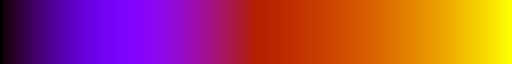

In [48]:
cmap

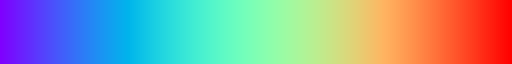

In [65]:
plt.cm.get_cmap('rainbow')

In [11]:
from matplotlib.colors import ListedColormap

In [12]:
# just to look at the color selection
my_cmap = ListedColormap(list_colors)

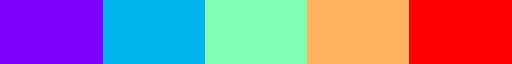

In [13]:
my_cmap

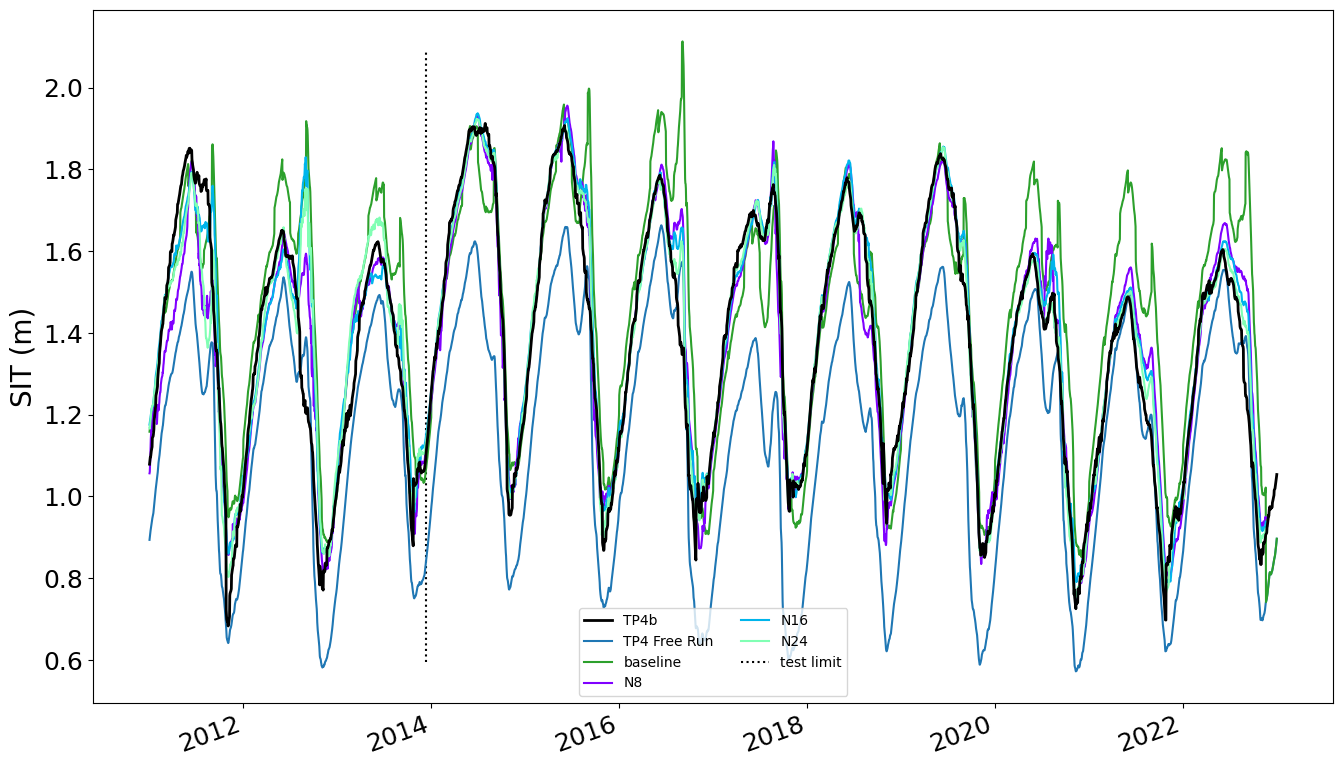

In [14]:
fig, ax = plt.subplots(figsize=(16,9))

# first model loaded is the default one
model_default = models[list(models.keys())[0]] 

model_default.sit_am.plot(c='k', lw=2, label='TP4b', zorder=10)
model_default.sit_nam.plot(label='TP4 Free Run', c='#1f77b4')
model_default.sit_blm.plot(label='baseline', c='#2ca02c')

for mdl, cl in zip(models, list_colors):
    models[mdl].sit_m.plot(label=mdl, c=cl)

mini, maxi = ax.get_ylim()
ax.plot([model_default.chrono.iloc[model_default.ntest]]*2, 
        [mini+.1, maxi-.1],ls=':', c='k', label='test limit', zorder=-10)

    
ax.set_ylabel('SIT (m)')
ax.set_xlabel('')

modif_plot.resize(fig, s=18, rx=20)

plt.legend(ncol=2, loc='lower center')

savefig=False
fig_dir = 'Leo/results/intercomp'
if savefig:
    filename = f'intercomp_sit.png'
    plt.savefig(f"{model_default.config.rootdir}{fig_dir}{filename}")
    print(f'Saved as: {model_default.config.rootdir}{fig_dir}{filename}')


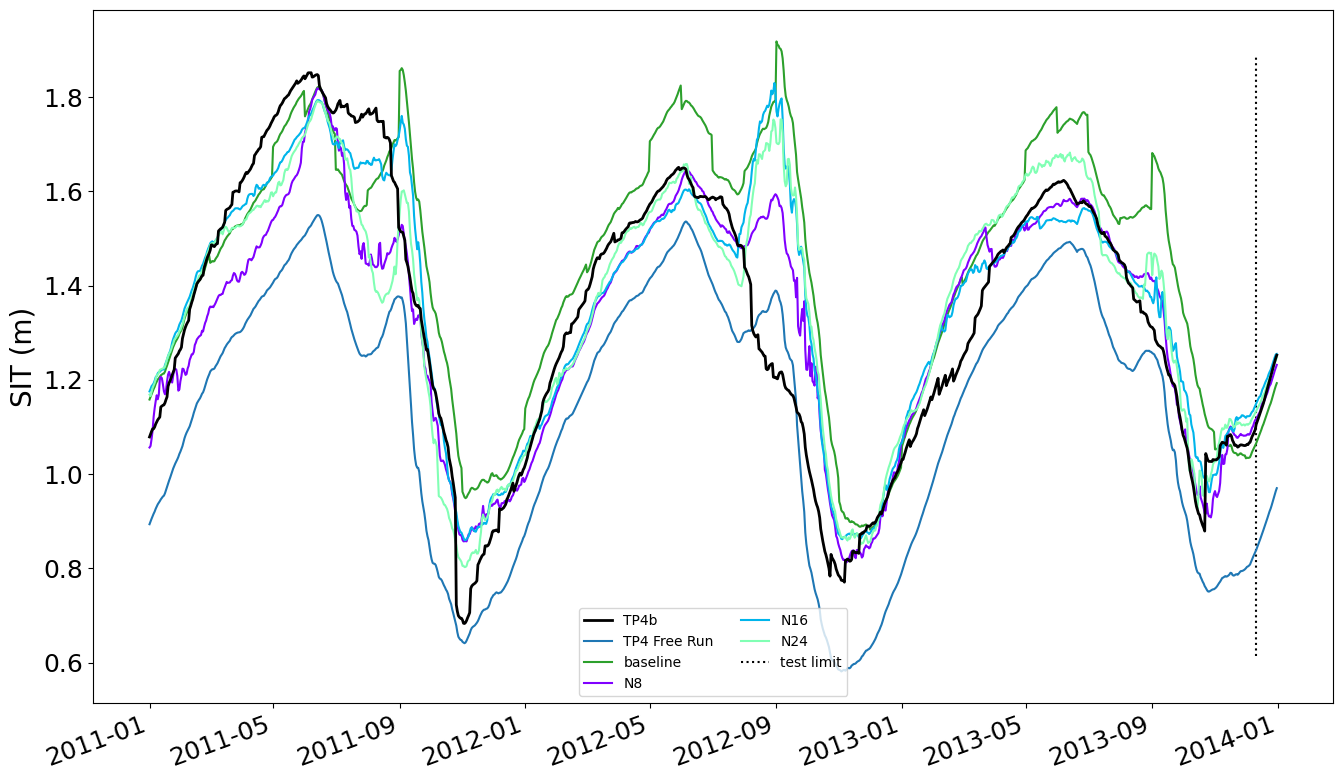

In [15]:
fig, ax = plt.subplots(figsize=(16,9))

# first model loaded is the default one
model_default = models[list(models.keys())[0]] 

model_default.sit_am.isel(time=slice(None,1096)).plot(c='k', lw=2, label='TP4b', zorder=10)
model_default.sit_nam.isel(time=slice(None,1096)).plot(label='TP4 Free Run', c='#1f77b4')
model_default.sit_blm.isel(time=slice(None,1096)).plot(label='baseline', c='#2ca02c')

for mdl, cl in zip(models, list_colors):
    models[mdl].sit_m.isel(time=slice(None,1096)).plot(label=mdl, c=cl)

mini, maxi = ax.get_ylim()
ax.plot([model_default.chrono.iloc[model_default.ntest]]*2, 
        [mini+.1, maxi-.1],ls=':', c='k', label='test limit', zorder=-10)

    
ax.set_ylabel('SIT (m)')
ax.set_xlabel('')

modif_plot.resize(fig, s=18, rx=20)

plt.legend(ncol=2, loc='lower center')

savefig=False
fig_dir = 'Leo/results/intercomp'
if savefig:
    filename = f'intercomp_sit.png'
    plt.savefig(f"{model_default.config.rootdir}{fig_dir}{filename}")
    print(f'Saved as: {model_default.config.rootdir}{fig_dir}{filename}')


In [46]:
# average bias 
bbb = (model_default.sit_m - model_default.sit_am).mean()

In [119]:
names

['N8', 'N16', 'N24']

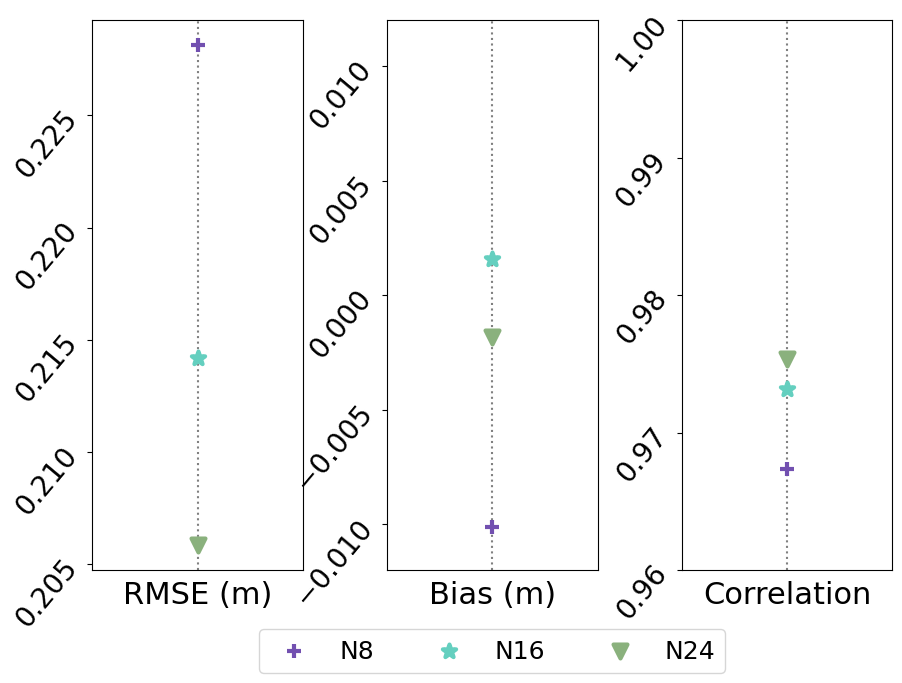

In [173]:
fig = plt.figure(figsize=(16, 9), constrained_layout=False)

gs1 = fig.add_gridspec(nrows=5, ncols=3, left=0.0, right=0.5, wspace=0.4)


ax1 = fig.add_subplot(gs1[:4, 0:1])  # y, x
ax2 = fig.add_subplot(gs1[:4, 1:2])
ax3 = fig.add_subplot(gs1[:4, 2:3])

# ax_lgd = fig.add_subplot(gs1[4:5, :])
# ax_lgd.set_visible(False)

markers = ['+', '*', 'v', '^']
colors = ['#7250B0', '#64CFBF', '#8ab17d', '#e9c46a', '#e76f51', '#ae2d68']
names = list(models.keys())

# ------------------  Plot  --------------------
n_mdl = 3  # number of model to plot
for n in range(n_mdl):
    ax1.scatter(0.5, models[names[n]].RMSE_rece_av, marker=markers[n], s=100, lw=3, c=colors[n])
    ax2.scatter(0.5, models[names[n]].bias_ml.mean(), marker=markers[n], s=100, lw=3, c=colors[n], label=f'{names[n]}')
    ax3.scatter(0.5, models[names[n]].corr_ml_t.mean(), marker=markers[n], s=100, lw=3, c=colors[n])
    


ax1.set_xlabel('RMSE (m)')
ax2.set_xlabel('Bias (m)')
ax3.set_xlabel('Correlation')



ax1.axvline(0.5, ls=':', c='grey', zorder=-10)
ax2.axvline(0.5, ls=':', c='grey', zorder=-10)
ax3.axvline(0.5, ls=':', c='grey', zorder=-10)

ax1.set_xticks([])
ax2.set_xticks([])
ax3.set_xticks([])

# ax1.set_ylim([0, 5])
# ax2.set_ylim([-15, 15])
ax2.set_ylim([-0.012, 0.012])
ax2.set_yticks([-0.01, -0.005, 0, 0.005, 0.01])

# ax2.set_yticks([-0.012, 0.012], rotation=20)
# ax2.set_yticks([-0.012, 0.012])

# ax3.set_yticks([-1,0,1])
ax3.set_ylim([0.96,1])
ax3.set_yticks([.96,.97,.98,.99,1])


# if n_mdl>3:
#     ncols = np.ceil(n_mdl/3)
if n_mdl <= 3:
    bbox_y = -0.21
elif n_mdl <= 6:
    bbox_y = -0.31
    
ax2.legend(loc='lower center', bbox_to_anchor=(0.5, bbox_y), ncols=3, fancybox=True, fontsize=18)

modif_plot.resize(fig, s=20, do_annotation=False)

ax1.set_yticklabels(ax1.get_yticklabels(), rotation=50)
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=50)
ax3.set_yticklabels(ax3.get_yticklabels(), rotation=50);




In [175]:
bias_full = model_default.sit - model_default.sit_a

In [180]:
rr = bias_full.to_numpy().reshape(4340*479*450)

In [ ]:
plt.violinplot(rr, [0])

/LUMI_CONTAINER/env1/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


## -------------------------------

In [ ]:
# Plot du 23/01/24

In [14]:
model_default = models[list(models.keys())[0]] 

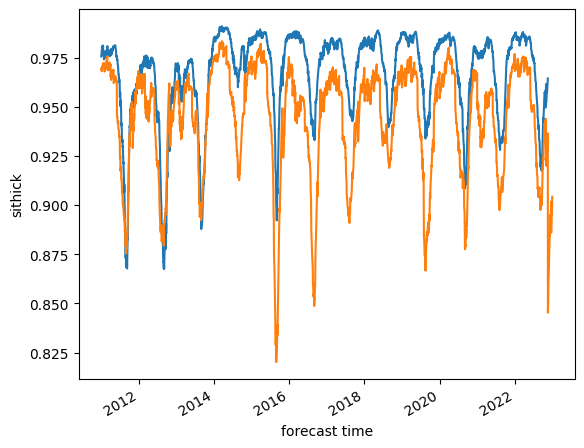

In [19]:
model_default.corr_ml_t.plot()
model_default.corr_bl_t.plot()

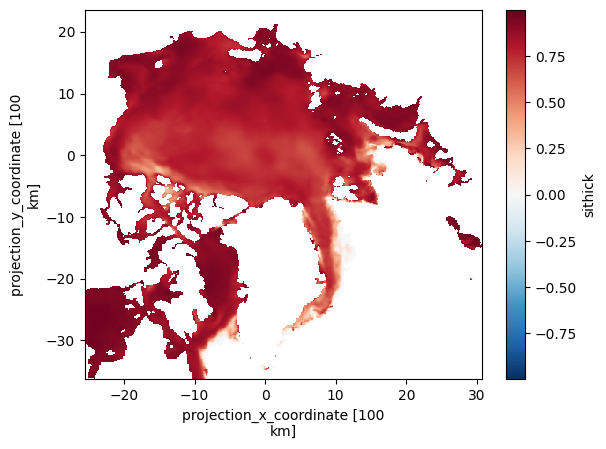

In [17]:
model_default.corr_na.plot()

In [52]:
n_mdl = len(list(models.keys()))

In [53]:
# Time axis for test period (always 2011-2014)
chrono = models[names[0]].chronoe['date'][:1096].to_xarray()

In [130]:
# ------------------------------------------------
##            RMSE for violin plots
# ------------------------------------------------

rmse_mdl = np.ones((1096, n_mdl)) * -999
# rmse_mdl = np.zeros((1096, n_mdl))


ii = 0  

for nm in range(n_mdl):
#     m_needpast, m_needfutur = models[names[nm]].config.needpast, models[names[nm]].config.needfutur
    m_needpast, m_needfutur = 0, 14
    
    length_ts = models[names[nm]].config.ntest-m_needfutur
    rmse_mdl[m_needpast:length_ts, ii] = models[names[nm]].RMSE_ml_t.isel(time=slice(m_needpast, length_ts)) 
#                               -models[names[nm]].sit_a.isel(time=slice(m_needpast, length_ts)))
    ii += 1

In [135]:
# ------------------------------------------------
##            Bias for violin plots
# ------------------------------------------------

bias_mdl = np.zeros((1096, n_mdl))
# bias_mdl = np.ones((1096, n_mdl)) * -999


ii = 0  

for nm in range(n_mdl):
#     m_needpast, m_needfutur = models[names[nm]].config.needpast, models[names[nm]].config.needfutur
    m_needpast, m_needfutur = 0, 14
    
    length_ts = models[names[nm]].config.ntest-m_needfutur
    bias_mdl[m_needpast:length_ts, ii] = models[names[nm]].bias_ml.isel(time=slice(m_needpast, length_ts)) 
#                               -models[names[nm]].sit_a.isel(time=slice(m_needpast, length_ts)))
    ii += 1

In [131]:
# ------------------------------------------------
##            corr for violin plots
# ------------------------------------------------

corr_mdl = np.ones((1096, n_mdl)) * -999
# corr_mdl = np.zeros((1096, n_mdl))


ii = 0  

for nm in range(n_mdl):
#     m_needpast, m_needfutur = models[names[nm]].config.needpast, models[names[nm]].config.needfutur
    m_needpast, m_needfutur = 0, 14
    
    length_ts = models[names[nm]].config.ntest-m_needfutur
    corr_mdl[m_needpast:length_ts, ii] = models[names[nm]].corr_ml_t.isel(time=slice(m_needpast, length_ts)) 
#                               -models[names[nm]].sit_a.isel(time=slice(m_needpast, length_ts)))
    ii += 1

In [57]:
# remove non valid values on time axis and violin plot

In [74]:
import copy

In [75]:
copy.deepcopy()

TypeError: deepcopy() missing 1 required positional argument: 'x'

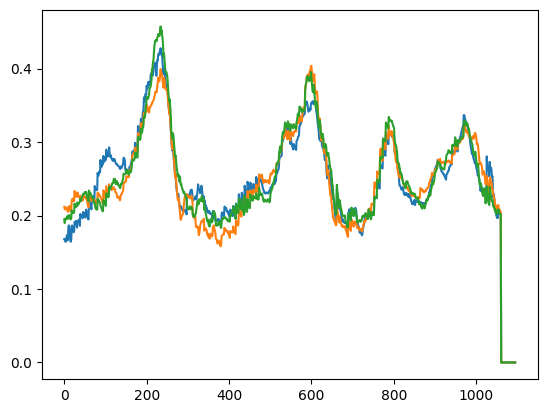

In [125]:
plt.plot(rmse_mdl)

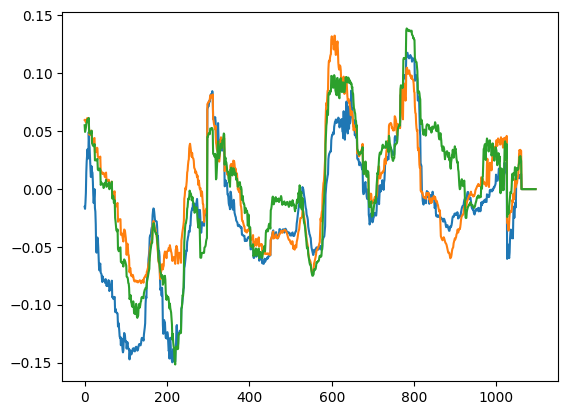

In [124]:
plt.plot(bias_mdl)

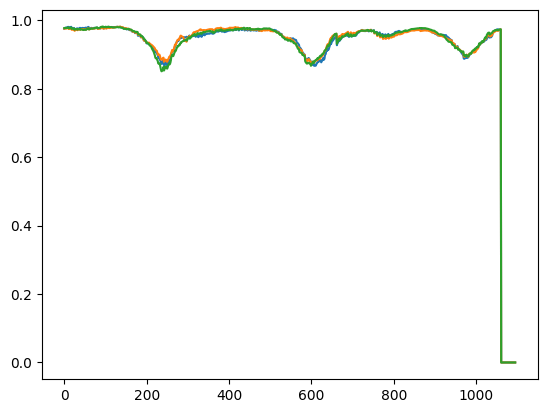

In [126]:
plt.plot(corr_mdl)

In [ ]:
_rmse = copy.deepcopy(rmse_mdl)
ind = np.where(_rmse==-999)  # indexes non valid
_rmse[ind[0], ind[1]] = np.nan

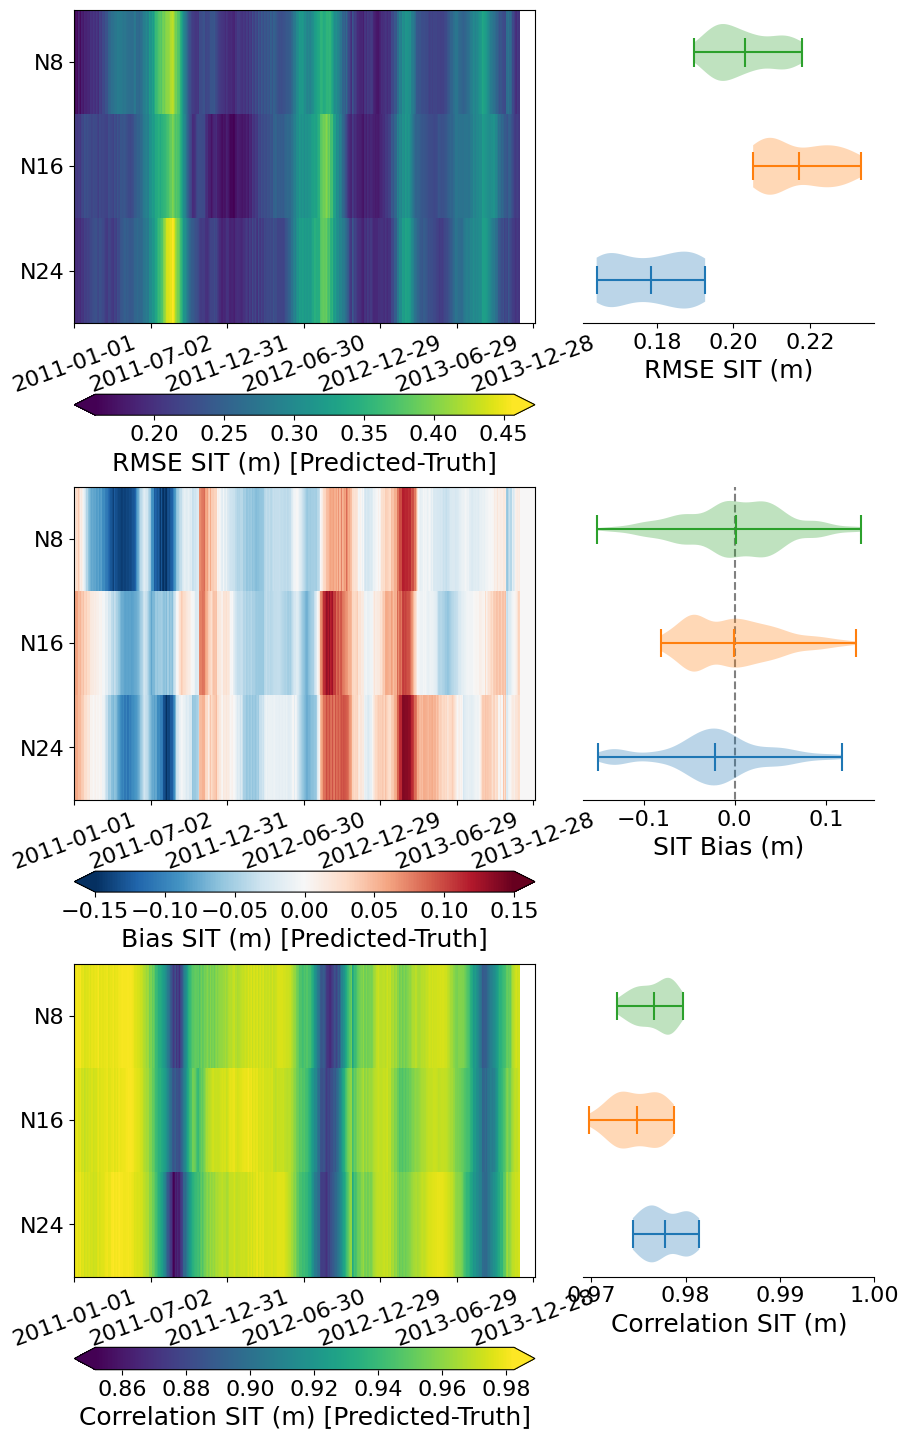

In [173]:
draw_bias_time(rmse_mdl, bias_mdl, corr_mdl, chrono, list(models.keys()))

In [172]:
def draw_bias_time(rmse_sit, bias_sit, corr_sit, chrono, names, 
                     n_mdl:int=3,
                     models_str='models', 
                     odir='', savefig=False, showfig=True):
    '''
    Parameters:
    -----------
        bias_sit       :    np.array, format (time, number of pc*number of model), bias for each PC
                                     in this order:
                                         PC 1, model 1,2,3,4,5 ...
                                         PC 2, model 1,2,3,4,5 ...
                                         PC 3...
        names         :    array of string, names of each model
        n_mdl         :    int, number of model
    '''
    
    
    ## check min/max date along models
    
    
#     fig, ax = plt.subplots(nrows=1, constrained_layout=True, figsize=(16,9))
    fig = plt.figure(figsize=(16, 9*2), constrained_layout=False)

    gs1 = fig.add_gridspec(nrows=12, ncols=5, left=0.0, right=0.5, wspace=0.4, hspace=0.6)

    # RMSE
    ax00 = fig.add_subplot(gs1[:3, :3])  # y, x
    ax01 = fig.add_subplot(gs1[:3, 3:5])
    cax00 = fig.add_subplot(gs1[3:4, :3], aspect=.015)
    cax01 = fig.add_subplot(gs1[3:4, 3:5], aspect=.3)
    cax01.set_visible(False)
    
    # Bias
    ax10 = fig.add_subplot(gs1[4:7, :3])  # y, x
    ax11 = fig.add_subplot(gs1[4:7, 3:5])
    cax10 = fig.add_subplot(gs1[7:8, :3], aspect=.015)
    cax11 = fig.add_subplot(gs1[7:8, 3:5], aspect=.3)
    cax11.set_visible(False)
    
    # Correlation
    ax20 = fig.add_subplot(gs1[8:11, :3])  # y, x
    ax21 = fig.add_subplot(gs1[8:11, 3:5])
    cax20 = fig.add_subplot(gs1[11:12, :3], aspect=.007)
    cax21 = fig.add_subplot(gs1[11:12, 3:5], aspect=.3)
    cax21.set_visible(False)
    
    # ------------------- RMSE -----------------------
    # --------------- TIME series --------------------
    
    _rmse = copy.deepcopy(rmse_sit)
    ind = np.where(_rmse==-999)  # indexes non valid
    _rmse[ind[0], ind[1]] = np.nan
    
    im0 = ax00.imshow(_rmse.T, aspect='auto', interpolation='None') #, vmin=0, vmax=.5)
    fig.colorbar(im0, cax=cax00, extend='both', shrink=0.6, orientation='horizontal', label='RMSE SIT (m) [Predicted-Truth]')
   
    # Time TickLabels
    time_ticks = np.arange(0,365*3,365//2)  # test period spans 3 years. 1 date every 6 months
    time_labels = chrono[time_ticks]
    time_labels_str = [pd.to_datetime(x.data).strftime('%Y-%m-%d') for x in time_labels]
    
    ax00.set_yticks(range(0, n_mdl))
    ax00.set_yticklabels(names)

    ax00.set_xticks(time_ticks)
    ax00.set_xticklabels(time_labels_str)

    ax00.set_xlim([0,1096])

    # --------------- VIOLON PLOT --------------------
    
    pos = np.arange(0, n_mdl)
    violons_mdl = {}  # dico of bias to plot different colors
    for nm in range(n_mdl):
        nn_ind = np.where(np.isnan(_rmse[:,nm]))[0]  # indexes nn valid
        violons_mdl[nm] = ax01.violinplot(rmse_sit[~nn_ind, nm], [pos[nm]], showmeans=True, widths=.5, vert=False)
    
#     ax01.set_xlim([0, .3])
    ax01.set_yticks([])
    ax01.set_xlabel('RMSE SIT (m)')
    ax01.spines[['left', 'right', 'top']].set_visible(False)
    
    # -------------------------------------------------------
    
    # --------------- BIAS  --------------------------
    # --------------- TIME series --------------------
    
    _bias = copy.deepcopy(bias_sit)
    ind = np.where(_bias==-999)  # indexes non valid
    _bias[ind[0], ind[1]] = np.nan
    
    im1 = ax10.imshow(_bias.T, aspect='auto', cmap=plt.get_cmap('RdBu_r'), interpolation='None', vmin=-.15, vmax=.15)
    fig.colorbar(im1, cax=cax10, extend='both', shrink=0.6, orientation='horizontal', label='Bias SIT (m) [Predicted-Truth]')
    
    ax10.set_yticks(range(0, n_mdl))
    ax10.set_yticklabels(names)

    ax10.set_xticks(time_ticks)
    ax10.set_xticklabels(time_labels_str)

    ax10.set_xlim([0,1096])

    # --------------- VIOLON PLOT --------------------
    
    pos = np.arange(0, n_mdl)
    violons_mdl = {}  # dico of bias to plot different colors
    for nm in range(n_mdl):
        nn_ind = (_bias[:,nm]==0)  # indexes nn valid
        violons_mdl[nm] = ax11.violinplot(bias_sit[~nn_ind, nm], [pos[nm]], showmeans=True, widths=.5, vert=False)

    ax11.axvline(x=0, ymin=-100, ymax=100, color='grey',ls='--', zorder=-10)        
        
    ax11.set_yticks([])
    ax11.set_xlabel('SIT Bias (m)')
    ax11.spines[['left', 'right', 'top']].set_visible(False)
    
    # -------------------------------------------------------
    
    
    # --------------- Correlation --------------------
    # --------------- TIME series --------------------
    
    _corr = copy.deepcopy(corr_sit)
    ind = np.where(_corr==-999)  # indexes non valid
    _corr[ind[0], ind[1]] = np.nan
    
#     vmin = 0.8
    im2 = ax20.imshow(_corr.T, aspect='auto', interpolation='None')  # , vmin=vmin, vmax=1)
    fig.colorbar(im2, cax=cax20, extend='both', shrink=0.6, orientation='horizontal', label='Correlation SIT (m) [Predicted-Truth]')
    
    ax20.set_yticks(range(0, n_mdl))
    ax20.set_yticklabels(names)

    ax20.set_xticks(time_ticks)
    ax20.set_xticklabels(time_labels_str)

    ax20.set_xlim([0,1096])

    # --------------- VIOLON PLOT --------------------
    
    pos = np.arange(0, n_mdl)
    violons_mdl = {}  # dico of bias to plot different colors
    for nm in range(n_mdl):
        nn_ind = np.where(np.isnan(_corr[:,nm]))[0]  # indexes nn valid
        violons_mdl[nm] = ax21.violinplot(corr_sit[~nn_ind, nm], [pos[nm]], showmeans=True, widths=.5, vert=False)
        
    ax21.set_xlim([ax21.get_xlim()[0], 1])
    ax21.set_yticks([])
    ax21.set_xlabel('Correlation SIT (m)')
    ax21.spines[['left', 'right', 'top']].set_visible(False)
    
    # -------------------------------------------------------
    
    
    modif_plot.resize(fig, s=16, do_annotation=False)
    
    ax00.set_xticklabels(time_labels_str, rotation=20)
    ax10.set_xticklabels(time_labels_str, rotation=20)
    ax20.set_xticklabels(time_labels_str, rotation=20)


    if savefig:
        ofile = f'intercomp_SIT_time_{models_str}_01.png'
        ofile = save_name.check(odir, ofile)
        plt.savefig(f"{odir}{ofile}", dpi=150, bbox_inches='tight')
        print(f'Saved as: {odir}{ofile}')

    if showfig:
        plt.show()

    plt.close()  

## -------------------------------

In [ ]:
# add SIT from Conv2D

In [9]:
import netCDF4 as nc4


In [11]:
irootdir= f'{rootdir}'
ipath = 'Leo/results/C2D_230308-185753/'
ml_name ='ConvLSTM2D'
ifile = f'ypred_ConvLSTM2D_H_epochs10_6feat.nc'

nc = nc4.Dataset(f'{irootdir}{ipath}ml/{ifile}', mode='r')
sit_c2d = xr.open_dataset(xr.backends.NetCDF4DataStore(nc))['sit_pred']
chrono_c2d = pd.DataFrame({'date':pd.to_datetime(sit_c2d['time'].to_numpy())})

In [26]:
from src.data_preparation import load_data

In [27]:
# Import Topaz 4
pca_dir = 'Leo/results/pca_i100-550_j300-629/'
target_field = 'sithick'
filename = os.path.join(rootdir,pca_dir,f"{target_field}_TOPAZ4b_2011_2019.nc")
sit_true, chrono_true = load_data.load_nc(filename, f'{target_field}', X_only=True)

In [28]:
# clean c2d_sit: nan on land and remove <0 values

sit_tmp = sit_c2d.where(sit_c2d>0, 0)
sit_ml = sit_tmp.where(~np.isnan(sit_true))

In [29]:
sit_ml

<xarray.DataArray 'sit_pred' (time: 2990, y: 329, x: 450)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2011-10-01 2011-10-02 ... 2019-12-07
  * y          (y) float32 -17.5 -17.38 -17.25 -17.12 ... 23.12 23.25 23.38 23.5
  * x          (x) float32 -25.5 -25.38 -25.25 -25.12 ... 30.25 30.38 30.5 30.62
    latitude   (y, x) float32 ...
    longitude  (y, x) float32 ...

In [57]:
import copy

In [68]:
ml_name ='ConvLSTM2Dx'

In [69]:
# Cheating to use Conv2D
# models[ml_name] = copy.deepcopy(models['ConvLSTM2D'])
models[ml_name].sit = sit_ml
models[ml_name].chrono = chrono_c2d

# del models['AK']

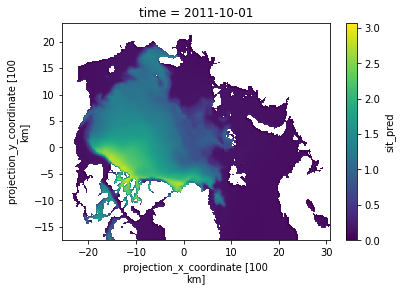

In [52]:
models['ConvLSTM2D'].sit.isel(time=0).plot()

In [37]:
models[ml_name].compute_mean()

KeyError: 'ConvLSTM2D'

In [65]:
models

{'ConvLSTM2D': <src.modelling.sit_corrected.SITCorrected at 0x14d095bf9580>,
 'ConvLSTM2Dx': <src.modelling.sit_corrected.SITCorrected at 0x14d05a7fa730>,
 'CNN': <src.modelling.sit_corrected.SITCorrected at 0x14d05a8bd670>}

In [32]:
from src.visualization import intercomp_sit

In [67]:
from importlib import reload
reload(intercomp_sit)
reload(modif_plot)

<module 'src.utils.modif_plot' from '/cluster/home/leoede/tardis/tardis-ml/src/utils/modif_plot.py'>

In [84]:
day = datetime.datetime(2012, 3, 15)

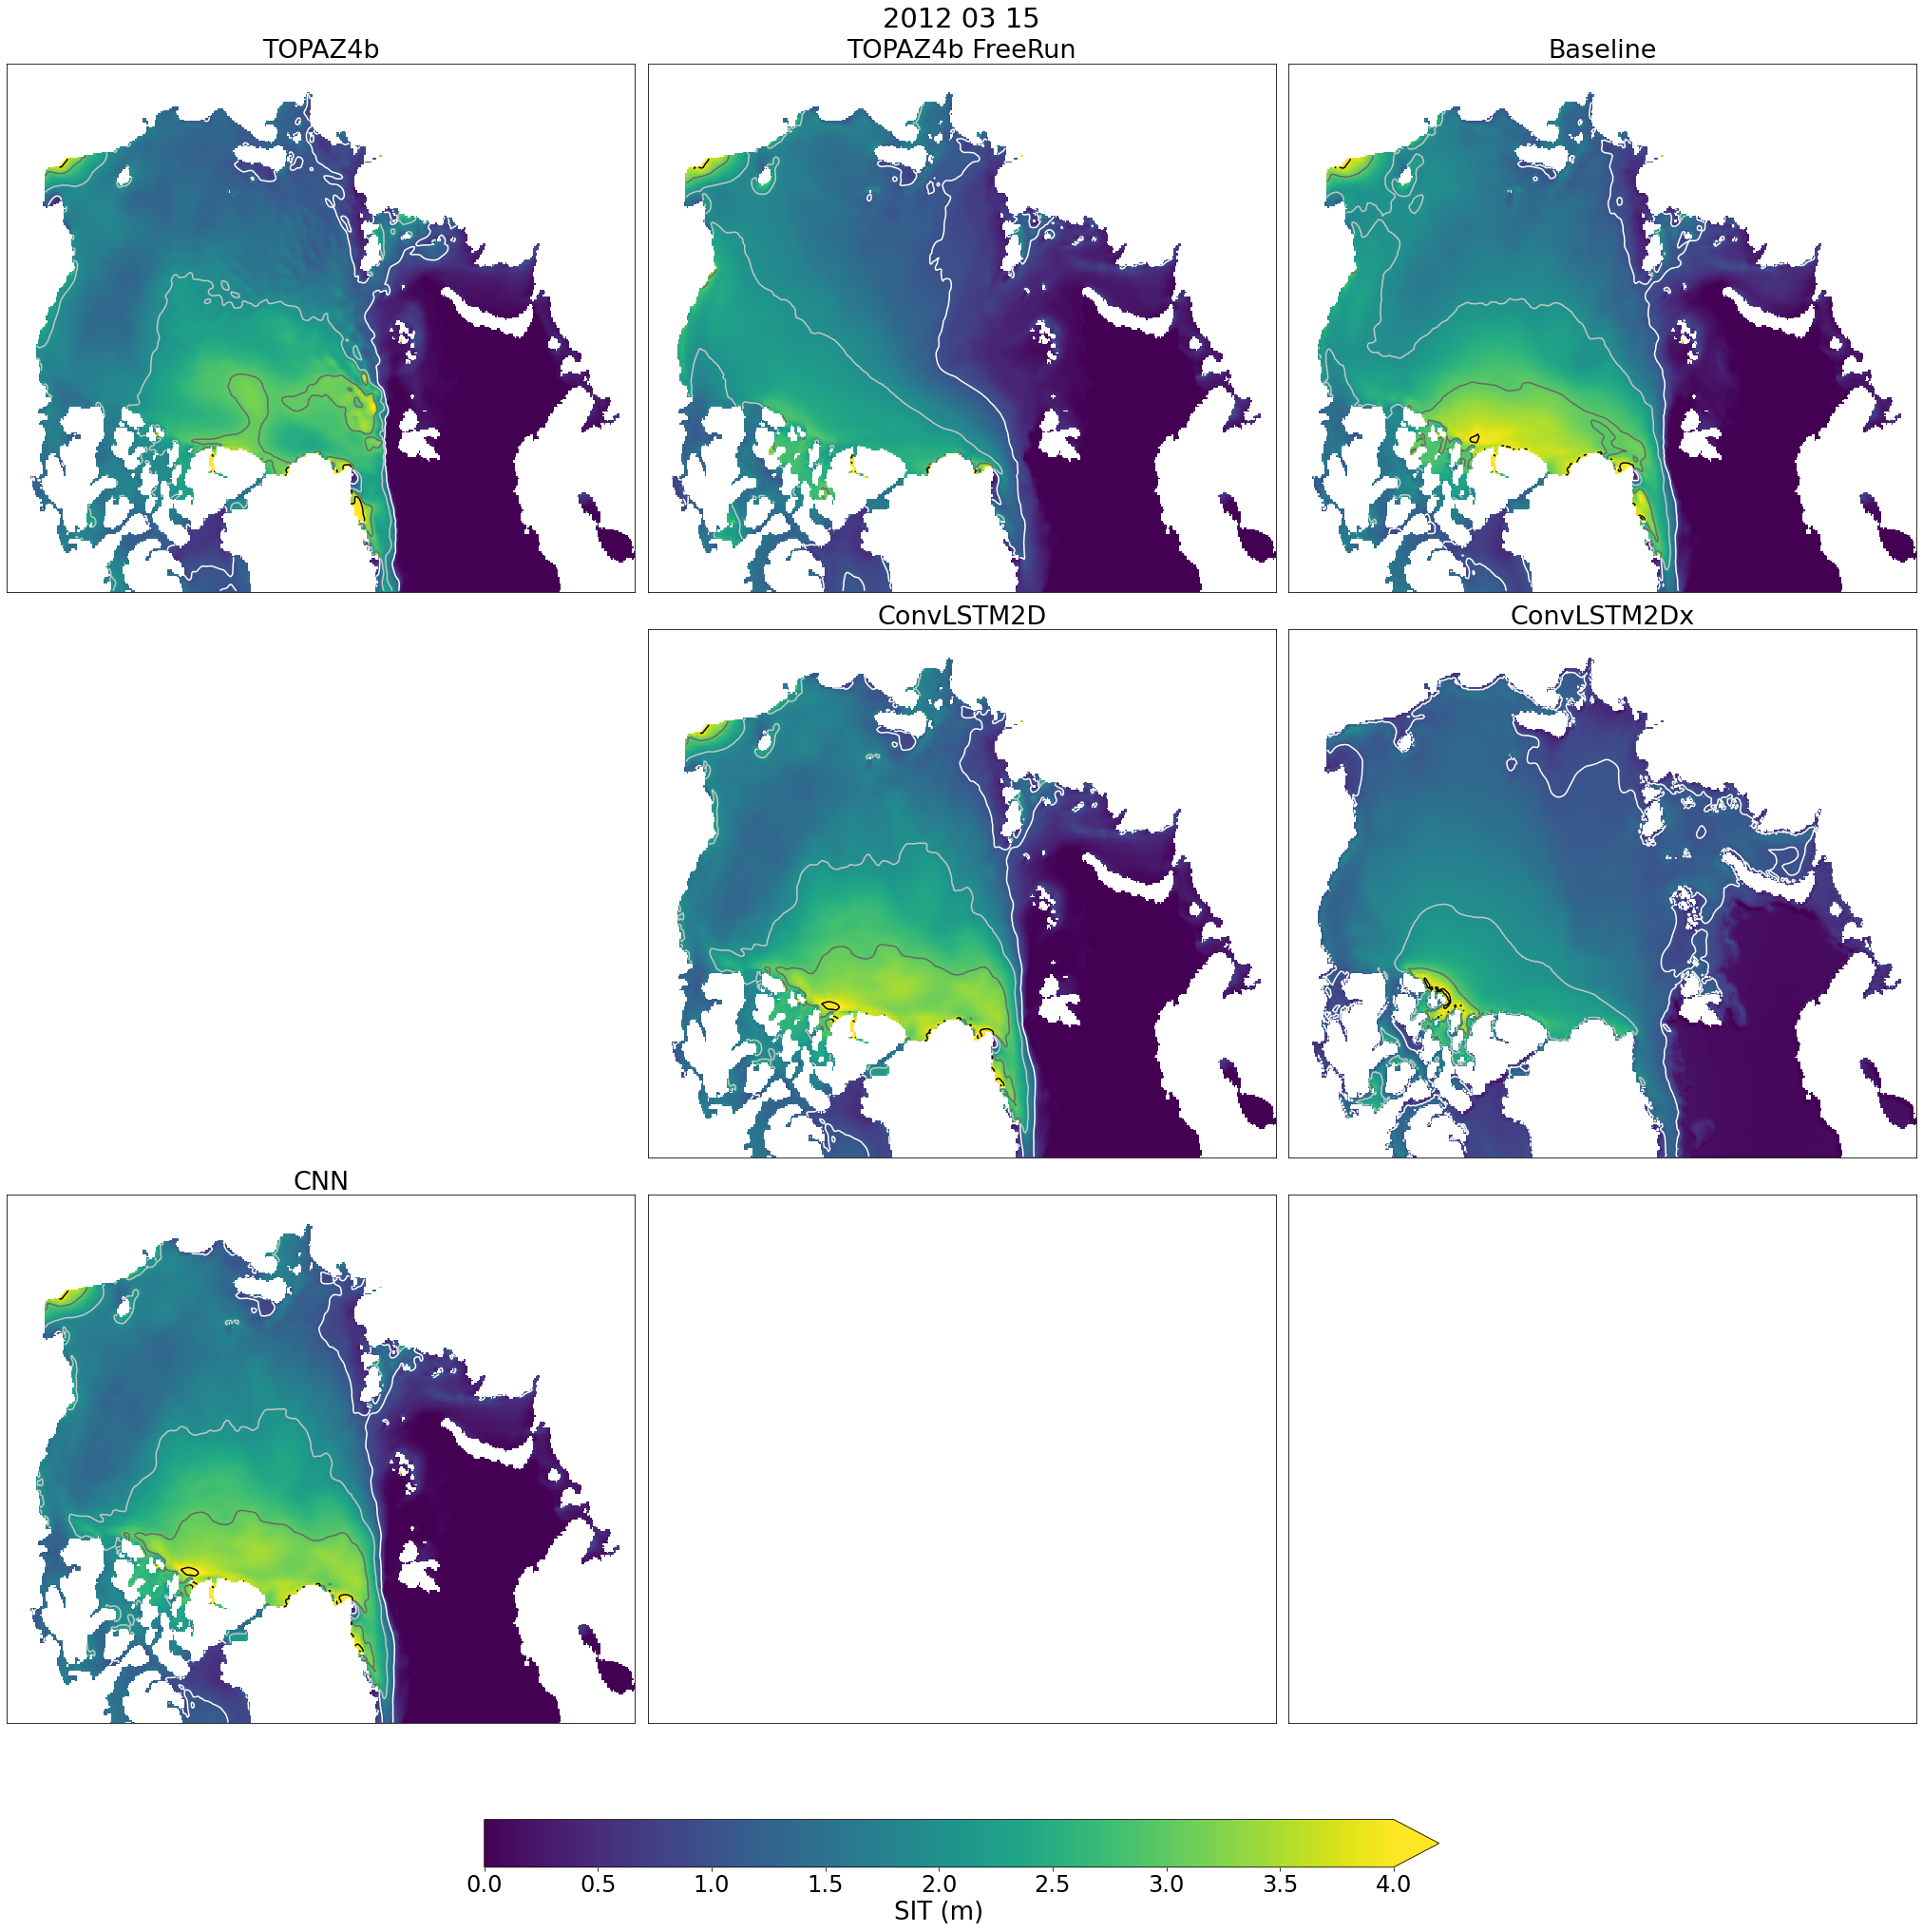

In [85]:
intercomp_sit.draw_spatial_reconstruct(models, day, showfig=True, savefig=False, bias=False)

In [35]:
model_default = models['AK']

In [36]:
first_day = model_default.chrono.iloc[0].date.date()
last_day = model_default.chrono.iloc[-1].date.date()

In [45]:
d1 = datetime.datetime.combine(first_day, datetime.time())

In [45]:
d1 = datetime.datetime(2011,1,1)
d2 = datetime.datetime(2011,1,4)

all_days = np.array([d1 + datetime.timedelta(days=x) for x in range((d2-d1).days + 1)])

In [ ]:
intercomp_sit.spat_reco_save_all(models, all_days, 
                                 rootdir='/cluster/work/users/leoede/', fig_dir='Leo/results/intercomp/')

In [47]:
# plt.rcParams['figure.dpi']

72.0